 # CNC Mill Tool Wear
 
 [Kaggel](https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill)


 ## 資料前處理
 ### 讀入資料集與資料轉成DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊

In [2]:
df_main=pd.read_csv('data/train.csv',encoding='big5')
x=df_main[['No','feedrate','clamp_pressure']]
y=df_main['tool_condition']

In [3]:
x_pre=0
for i in range(1,x.shape[0]+1):
    if i<10:
        df=pd.read_csv('data/experiment_'+'0'+str(i)+'.csv',encoding='big5')
    else:
         df=pd.read_csv('data/experiment_'+str(i)+'.csv',encoding='big5')
    # 去除machining_process裡prep 跟 end
    df = df[(df['Machining_Process']!='Prep') & (df['Machining_Process']!='End') & (df['Machining_Process']!='end')].reset_index(drop=True)
    #'Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage' 都是0 ,'S1_SystemInertia','M1_CURRENT_PROGRAM_NUMBER'  數值一樣
    tmp=df[['X1_ActualPosition','X1_ActualVelocity','X1_ActualAcceleration','X1_CommandPosition','X1_CommandVelocity',
            'X1_CommandAcceleration','X1_DCBusVoltage','X1_OutputCurrent','X1_OutputVoltage','X1_OutputPower',
            'Y1_ActualPosition','Y1_ActualVelocity','Y1_ActualAcceleration','Y1_CommandPosition',
            'Y1_CommandVelocity','Y1_CommandAcceleration','Y1_CurrentFeedback','Y1_DCBusVoltage',
            'Y1_OutputCurrent','Y1_OutputVoltage','Y1_OutputPower','Z1_ActualPosition','Z1_ActualVelocity',
            'Z1_ActualAcceleration','Z1_CommandPosition','Z1_CommandVelocity','Z1_CommandAcceleration',
            'S1_ActualPosition','S1_ActualVelocity','S1_ActualAcceleration','S1_CommandPosition',
            'S1_CommandVelocity','S1_CommandAcceleration','S1_CurrentFeedback','S1_DCBusVoltage',
            'S1_OutputCurrent','S1_OutputVoltage','S1_OutputPower','M1_sequence_number','M1_CURRENT_FEEDRATE']].mean(axis=0)
    tmp=tmp.to_frame().T
    tmp['No']=i
    if(i==1):
        x_pre=tmp
    else:
        x_pre=x_pre.append(tmp,ignore_index=True)


### 相關性測試

In [4]:
x = pd.merge(x, x_pre, how='left', on=['No'])

In [5]:
corr =x.corr()

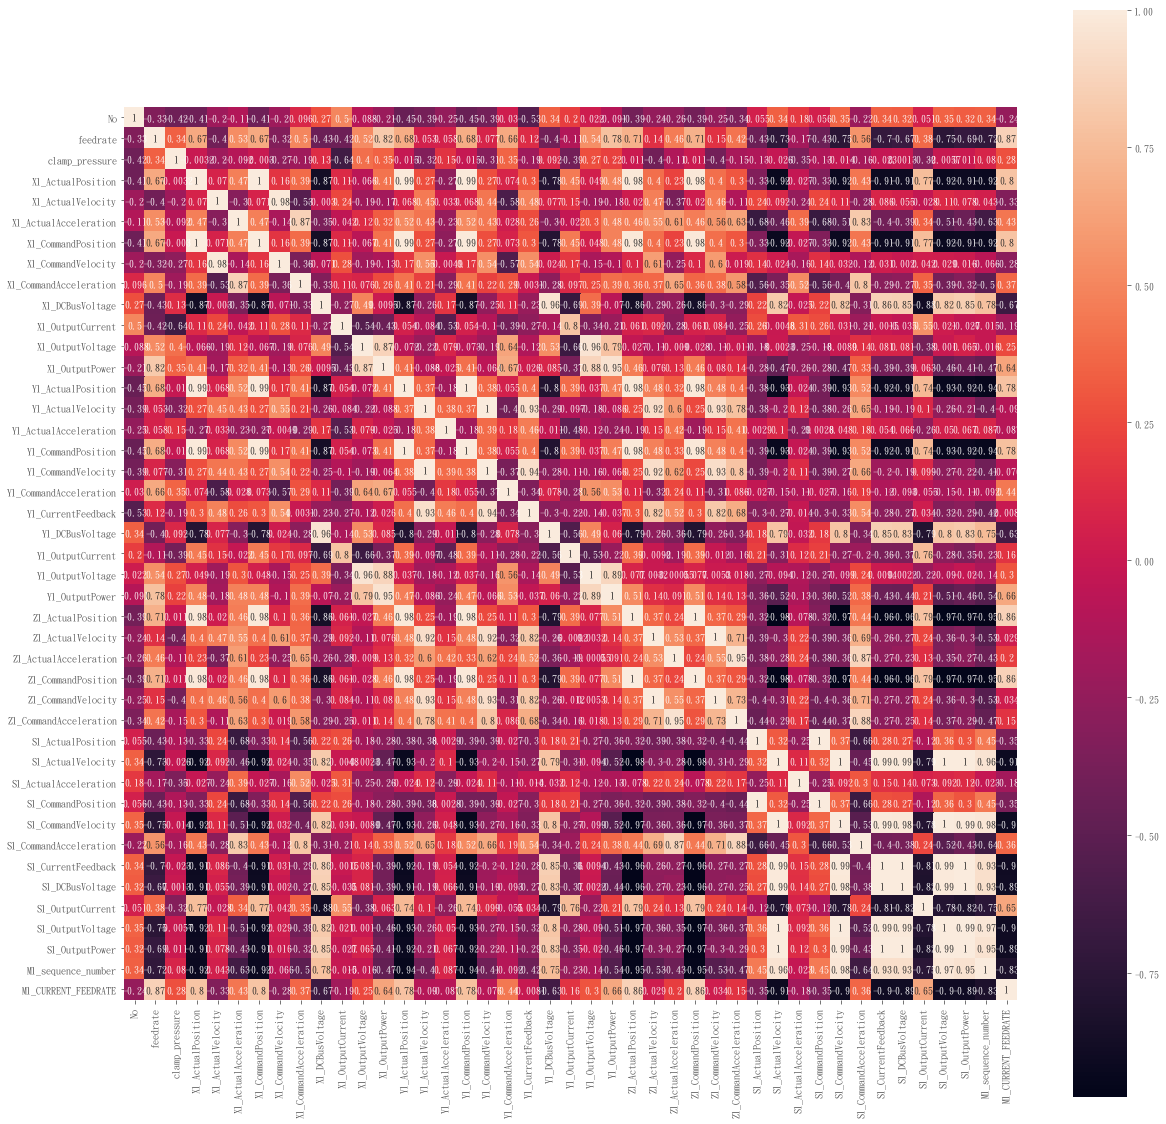

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)
plt.figure(figsize=(20,20))
sns.heatmap(corr, square=True, annot=True)
plt.show()

### 刪除特徵

In [7]:
x = x.drop('No' ,axis=1)

# clamp_pressure ,X1_ActualAcceleration ,Y1_DCBusVoltage
x=x.drop('X1_ActualAcceleration' ,axis=1)
x=x.drop('Y1_DCBusVoltage' ,axis=1)


#  X1_ActualPosition,	Y1_ActualPosition , Y1_CommandPosition ,X1_CommandPosition ,Z1_ActualPosition ,Z1_CommandPosition ,	S1_CurrentFeedback 流其中一個 相關性大
x=x.drop('X1_CommandPosition' ,axis=1)
x=x.drop('Y1_ActualPosition' ,axis=1)
x=x.drop('Y1_CommandPosition' ,axis=1)
x=x.drop('Z1_ActualPosition' ,axis=1)
x=x.drop('Z1_CommandPosition' ,axis=1)

x=x.drop('S1_CurrentFeedback' ,axis=1)
x=x.drop('S1_DCBusVoltage' ,axis=1)
x=x.drop('S1_OutputVoltage' ,axis=1)
x=x.drop('S1_OutputPower' ,axis=1)
x=x.drop('M1_sequence_number' ,axis=1)
x=x.drop('S1_ActualVelocity' ,axis=1)

# X1_ActualVelocity, X1_CommandVelocity , 
x=x.drop('X1_CommandVelocity' ,axis=1)

# Y1_ActualVelocity ,Y1_CommandVelocity ,Y1_CurrentFeedback ,Z1_ActualVelocity ,Z1_CommandVelocity
x=x.drop('Y1_CommandVelocity' ,axis=1)
x=x.drop('Y1_CurrentFeedback' ,axis=1)
x=x.drop('Z1_ActualVelocity' ,axis=1)
x=x.drop('Z1_CommandVelocity' ,axis=1)

#X1_OutputPower ,Y1_OutputPower
x=x.drop('Y1_OutputPower' ,axis=1)

#Z1_CommandAcceleration  Z1_ActualAcceleration
x=x.drop('Z1_ActualAcceleration' ,axis=1)

#X1_ActualPosition ,S1_CommandVelocity
x=x.drop('S1_CommandVelocity' ,axis=1)

#S1_CommandPosition ,	S1_ActualPosition
x=x.drop('S1_ActualPosition' ,axis=1)
#X1_OutputVoltage  Y1_OutputVoltage
x=x.drop('Y1_OutputVoltage' ,axis=1)

### 特徵刪除後第二次相關性測試

In [8]:
corr =x.corr()

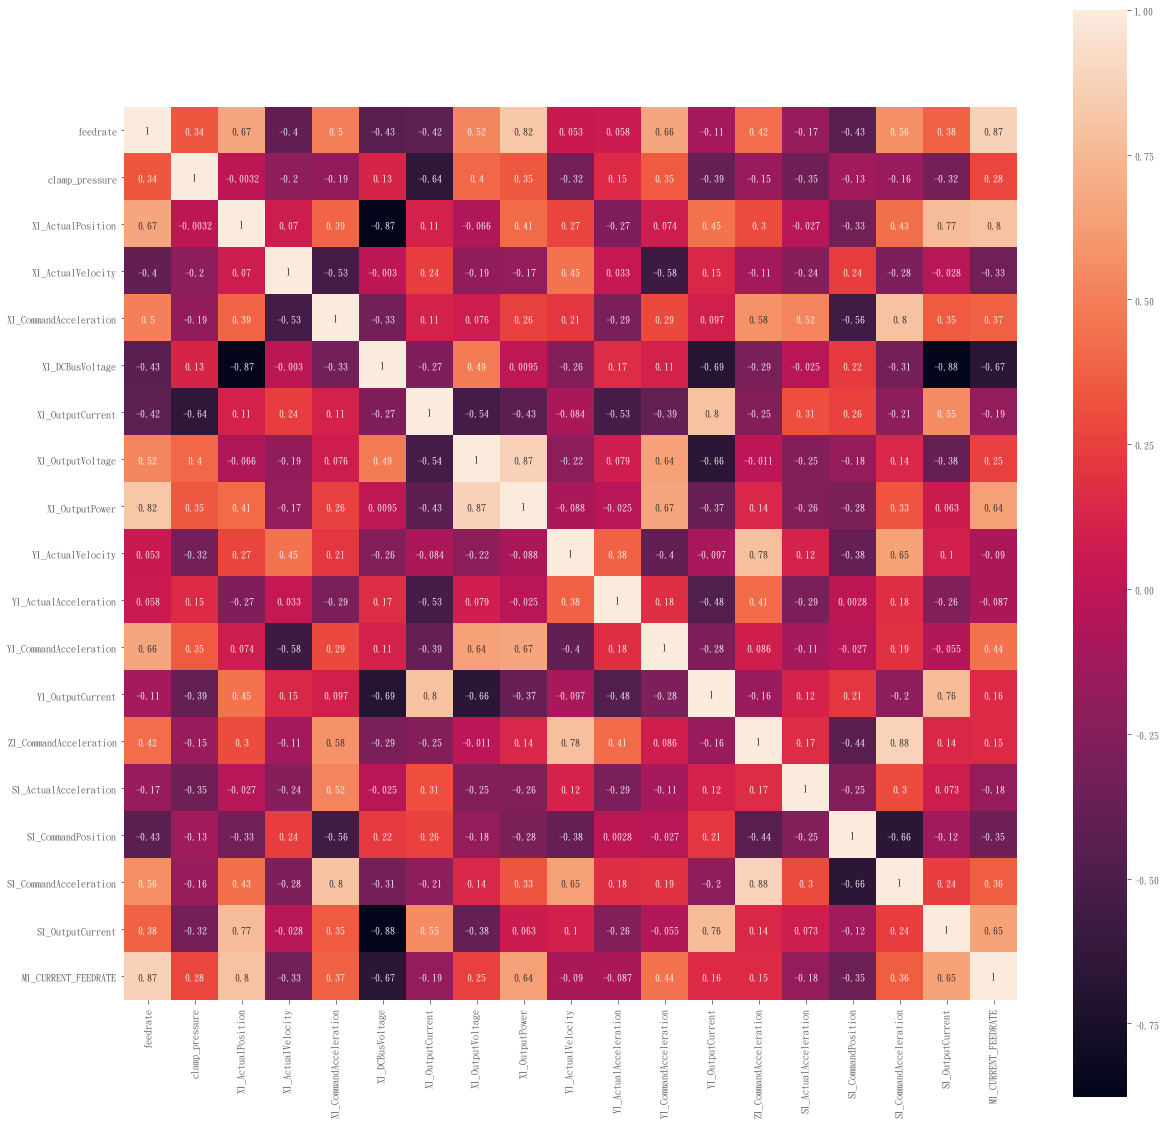

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)
plt.figure(figsize=(20,20))
sns.heatmap(corr, square=True, annot=True)
plt.show()

### 輸出資料前處理後資料集

In [10]:
x.to_csv("x.csv")

In [11]:
y.to_csv("y.csv")

### 訓練與測試資料切割

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### 資料標準化

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 模型一：決策樹

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['feedrate', 'clamp_pressure', 'X1_ActualPosition', 'X1_ActualVelocity',
       'X1_CommandAcceleration', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualVelocity',
       'Y1_ActualAcceleration', 'Y1_CommandAcceleration', 'Y1_OutputCurrent',
       'Z1_CommandAcceleration', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandAcceleration', 'S1_OutputCurrent', 'M1_CURRENT_FEEDRATE'],
                class_names=['unworn','worn'],)

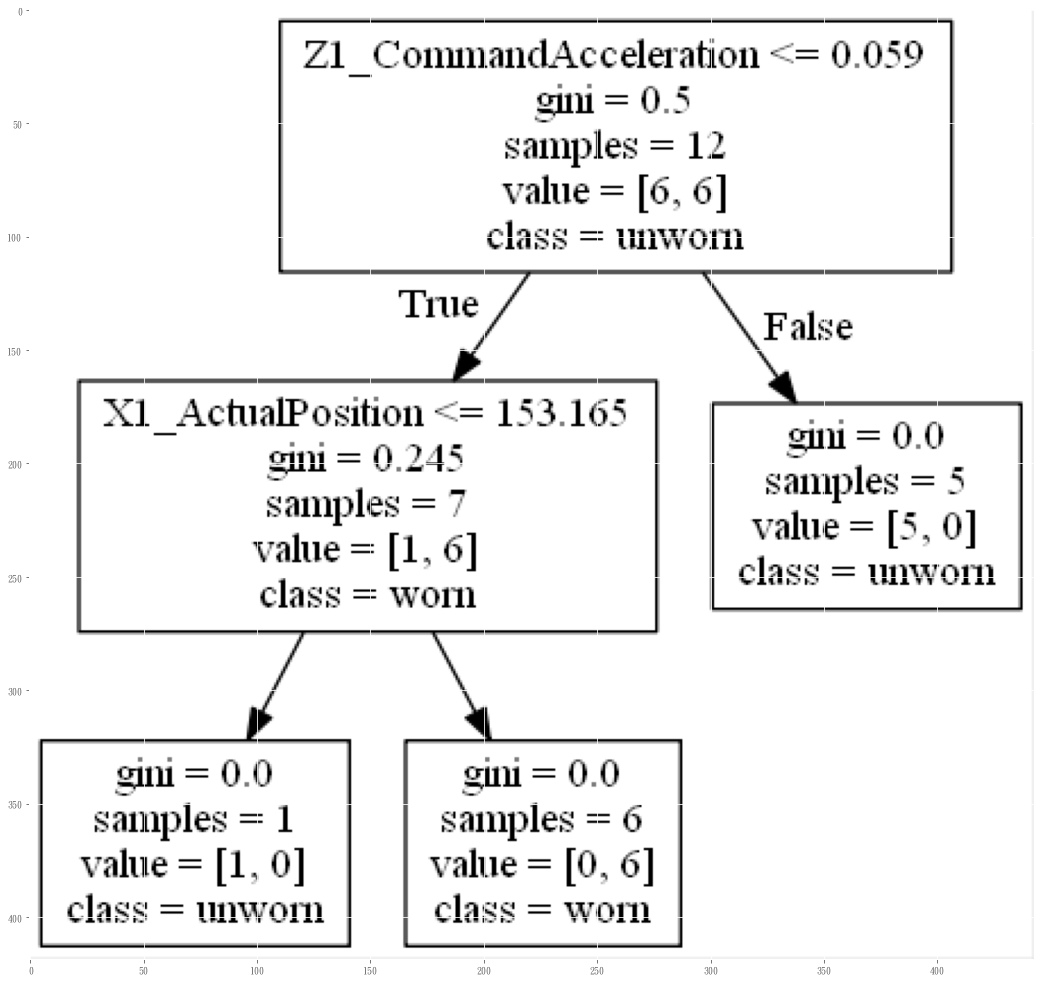

In [15]:
!dot -Tpng tree.dot -o tree.png
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(18,20))
plt.imshow(img)

### 決策樹混淆矩陣

In [16]:
from sklearn import metrics

print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['unworn','worn']))

#             predict
#t         unworn   worn
#r  unworn [[1        2]
#u  worn   [ 1        2]]
#e

              precision    recall  f1-score   support

      unworn       0.40      1.00      0.57         2
        worn       1.00      0.25      0.40         4

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6

[[2 0]
 [3 1]]


## 模型二：SVM分類模型

In [17]:
from sklearn import svm

In [18]:
X_train

,feedrate,clamp_pressure,X1_ActualPosition,X1_ActualVelocity,X1_CommandAcceleration,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandAcceleration,Y1_OutputCurrent,Z1_CommandAcceleration,S1_ActualAcceleration,S1_CommandPosition,S1_CommandAcceleration,S1_OutputCurrent,M1_CURRENT_FEEDRATE
4,20,3.0,168.861111,-0.679028,30.609722,0.053619,325.638889,8.426486,0.000985,2.957292,8.778472,3.100972,324.458333,1.388889e+01,1.399000,-1367.777778,5.555556e+00,323.500000,25.916667
2,6,3.0,159.253193,-0.500834,-1.308224,0.068296,327.114951,8.336683,0.000618,-0.430646,-2.034410,-1.005694,325.858753,5.634860e-01,0.186625,286.227175,4.507889e-01,322.680691,11.950413
5,6,4.0,155.666946,-0.331103,-0.006331,0.075182,325.255872,9.330368,0.000717,-0.524505,-1.261787,-1.190447,324.011745,-7.046932e-02,0.336078,-163.665790,4.194631e-01,319.779362,14.895973
12,3,4.0,154.347440,-0.148268,0.611700,0.070993,327.230408,7.484860,0.000362,-0.304754,-0.545219,-0.569312,325.858934,-1.011129e+00,-0.265602,-314.683208,2.612330e-01,322.112330,9.286311
15,20,3.0,175.402778,-0.979676,34.998380,0.055401,328.245370,10.909426,0.001712,-1.542731,-12.763194,9.355507,326.921296,-4.425926e-07,2.350956,-523.250000,2.314815e+00,325.703704,39.583333
11,3,3.0,152.644575,-0.178476,0.905817,0.070275,327.197349,7.685518,0.000354,-0.340245,0.527811,1.407242,325.777123,-2.454591e-01,0.091206,30.643540,2.945508e-01,322.173785,9.414335
10,3,4.0,155.705487,-0.218812,0.671628,0.070062,327.305901,7.292762,0.000364,-0.447503,-1.094048,0.312186,325.928054,1.183228e-01,1.674633,-383.783933,2.587992e-01,322.106625,10.273810
1,20,4.0,184.571818,-0.361011,3.420562,0.026147,326.795099,4.941066,0.000705,-0.497529,-1.291865,3.937699,328.665078,1.446562e+00,-0.673349,-146.123213,3.403676e-01,326.597686,43.117767
8,15,4.0,161.928367,-0.638173,0.093820,0.070842,325.197708,11.921156,0.001454,-1.069341,1.516905,7.407479,323.972779,-2.641835e+00,-0.558453,-1085.338231,8.595989e-01,321.368195,30.042980
14,6,3.0,155.722345,-0.368921,-4.113218,0.065345,327.727876,8.354942,0.000600,-0.870730,6.683794,2.892711,326.335177,-8.606200e-01,0.260431,-42.206217,1.477434e-08,324.383850,21.185841


In [19]:
y_train

4     unworn
2     unworn
5       worn
12      worn
15      worn
11    unworn
10    unworn
1     unworn
8       worn
14      worn
3     unworn
17      worn
Name: tool_condition, dtype: object

In [20]:
from sklearn import svm

### SVM超參數
* decision_function_shape："ovo" 一對一、 "ovr" 多對多、None (default=None)
* Kernel：kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, (default=’rbf’)
* C：target function的懲罰係數，用來平衡分類間隔與樣本分割錯誤的 (default C = 1.0)
    * 代表了對誤差的寬容度，越高代表越不能容忍錯誤，因此容易出現overfitting；反之則容易出現underfitting。過大或過小都代表了泛化能力的不佳。
    * 泛化能力(Generalization Ability): 對新資料的適應能力
* gamma：Kernel function的係數，包含 'Poly', 'RBF' and 'Sigmoid'   (default gamma = 1 / n_features) 
    * 決定了數據map到新的特徵空間後的分布，越大則支持向量越少、越小則支持向量越多。
    * 影響訓練與預測的速度

In [21]:
#Create a svm Classifier

clf = svm.SVC(decision_function_shape='ovo',
             C=0.5,
             kernel='rbf', gamma=5)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
print(y_test)

0     unworn
6       worn
9       worn
16    unworn
13      worn
7       worn
Name: tool_condition, dtype: object


In [23]:
print(y_pred)

['unworn' 'worn' 'worn' 'worn' 'worn' 'worn']


In [24]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


#### Kernel Function的選擇
相同的decision_function_shape, C, gamma下Accuracy的表現：
1. Linear Accuracy = 0.5
2. Polynomial Accuracy = 0.3333333
3. RBF Accuracy = 0.8333333333333334
4. Sigmoid Accuracy = 0.6666666666666666

### SVM混淆矩陣

In [25]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred,labels=['unworn','worn']))

#             predict
#t         unworn   worn
#r  unworn [[0        3]
#u  worn   [ 0        3]]
#e


              precision    recall  f1-score   support

      unworn       1.00      0.50      0.67         2
        worn       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

[[1 1]
 [0 4]]


## 模型三：邏輯斯迴歸 Logistic Regression

對勝算比取對數作迴歸後，再透過Sigmoid函數轉換，將結果對應到相對的事件發生機率。

若機率大於0.5代表事件發生機率相對高，則回傳1 ; 若機率<0.5代表事件發生機率相對低，則回傳0。

In [26]:
from sklearn import linear_model

In [27]:
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\jam68ty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
y_pred

array(['unworn', 'worn', 'worn', 'worn', 'unworn', 'worn'], dtype=object)

In [29]:
model.predict_proba(X_test)

array([[7.15678022e-01, 2.84321978e-01],
       [7.09640535e-03, 9.92903595e-01],
       [8.42165252e-04, 9.99157835e-01],
       [1.60097586e-01, 8.39902414e-01],
       [6.40038994e-01, 3.59961006e-01],
       [4.61635595e-01, 5.38364405e-01]])

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### Logistic Regression 混淆矩陣

In [31]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred ,labels=['unworn','worn']))

#             predict
#t         unworn   worn
#r  unworn [[1        2]
#u  worn   [ 3        0]]
#e

              precision    recall  f1-score   support

      unworn       0.50      0.50      0.50         2
        worn       0.75      0.75      0.75         4

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6

[[1 1]
 [1 3]]
